<a href="https://colab.research.google.com/github/lanashin/CST2312/blob/main/CST3512Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [31]:
from google.colab import files
uploaded = files.upload()

Saving Bitcoin_Historical_Data_Investing.csv to Bitcoin_Historical_Data_Investing (1).csv


In [71]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Bitcoin_Historical_Data_Investing.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
#file = "/content/Bitcoin_Historical_Data_Investing.csv"
#data = pd.read_csv(file)

In [72]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Apr 18, 2022","40,838.0","39,700.0","41,095.0","38,577.0",487.59M,2.86%
1,"Apr 17, 2022","39,703.0","40,382.0","40,599.0","39,561.0",210.01M,-1.68%
2,"Apr 16, 2022","40,382.0","40,571.0","40,691.0","40,003.0",151.31M,-0.44%
3,"Apr 15, 2022","40,560.0","39,936.0","40,850.0","39,781.0",233.09M,1.56%
4,"Apr 14, 2022","39,936.0","41,133.0","41,494.0","39,585.0",294.29M,-2.91%


In [73]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
3300,"Apr 05, 2013",142.3,132.1,144.9,130.2,68.59K,7.72%
3301,"Apr 04, 2013",132.1,135.0,142.1,116.4,88.36K,-2.13%
3302,"Apr 03, 2013",135.0,118.0,147.0,110.0,152.71K,14.43%
3303,"Apr 02, 2013",118.0,104.0,118.4,99.0,81.29K,13.44%
3304,"Apr 01, 2013",104.0,93.0,106.0,92.2,90.56K,11.79%


In [74]:
# covert to datetime
data['Date'] = pd.to_datetime(data['Date'])
# show the types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3305 entries, 0 to 3304
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3305 non-null   datetime64[ns]
 1   Price     3305 non-null   object        
 2   Open      3305 non-null   object        
 3   High      3305 non-null   object        
 4   Low       3305 non-null   object        
 5   Vol.      3305 non-null   object        
 6   Change %  3305 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 180.9+ KB


In [75]:
data['Price']=data['Price'].str.replace(',','')
data['Open']=data['Open'].str.replace(',','')
data['High']=data['High'].str.replace(',','')
data['Low']=data['Low'].str.replace(',','')
data['Change %']=data['Change %'].str.replace('%','')
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-04-18,40838.0,39700.0,41095.0,38577.0,487.59M,2.86
1,2022-04-17,39703.0,40382.0,40599.0,39561.0,210.01M,-1.68
2,2022-04-16,40382.0,40571.0,40691.0,40003.0,151.31M,-0.44
3,2022-04-15,40560.0,39936.0,40850.0,39781.0,233.09M,1.56
4,2022-04-14,39936.0,41133.0,41494.0,39585.0,294.29M,-2.91


In [76]:
data.rename(columns={'Change %':'Change'})

,Date,Price,Open,High,Low,Vol.,Change
0,2022-04-18,40838.0,39700.0,41095.0,38577.0,487.59M,2.86
1,2022-04-17,39703.0,40382.0,40599.0,39561.0,210.01M,-1.68
2,2022-04-16,40382.0,40571.0,40691.0,40003.0,151.31M,-0.44
3,2022-04-15,40560.0,39936.0,40850.0,39781.0,233.09M,1.56
4,2022-04-14,39936.0,41133.0,41494.0,39585.0,294.29M,-2.91
...,...,...,...,...,...,...,...
3300,2013-04-05,142.3,132.1,144.9,130.2,68.59K,7.72
3301,2013-04-04,132.1,135.0,142.1,116.4,88.36K,-2.13
3302,2013-04-03,135.0,118.0,147.0,110.0,152.71K,14.43
3303,2013-04-02,118.0,104.0,118.4,99.0,81.29K,13.44


In [77]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Ohlc(x=data['Date'],
                    open=data['Open'],
                    high=data['High'],
                    low=data['Low'],
                    close=data['Price']))
fig.show()

In [91]:
mask = (data['Date'] > '2017-07-04') & (data['Date'] <= '2022-04-18')
data2= data.loc[mask]
print(data2)

           Date    Price     Open     High      Low     Vol. Change %
0    2022-04-18  40838.0  39700.0  41095.0  38577.0  487.59M     2.86
1    2022-04-17  39703.0  40382.0  40599.0  39561.0  210.01M    -1.68
2    2022-04-16  40382.0  40571.0  40691.0  40003.0  151.31M    -0.44
3    2022-04-15  40560.0  39936.0  40850.0  39781.0  233.09M     1.56
4    2022-04-14  39936.0  41133.0  41494.0  39585.0  294.29M    -2.91
...         ...      ...      ...      ...      ...      ...      ...
1744 2017-07-09   2511.4   2564.9   2576.7   2509.6   39.16K    -2.08
1745 2017-07-08   2564.9   2513.9   2568.7   2480.6   54.51K     2.03
1746 2017-07-07   2513.9   2614.2   2617.5   2484.7   90.45K    -3.84
1747 2017-07-06   2614.2   2627.9   2634.8   2581.8   60.16K    -0.52
1748 2017-07-05   2627.9   2617.3   2642.7   2562.0   89.72K     0.40

[1749 rows x 7 columns]


In [90]:
data2.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1744,2017-07-09,2511.4,2564.9,2576.7,2509.6,39.16K,-2.08
1745,2017-07-08,2564.9,2513.9,2568.7,2480.6,54.51K,2.03
1746,2017-07-07,2513.9,2614.2,2617.5,2484.7,90.45K,-3.84
1747,2017-07-06,2614.2,2627.9,2634.8,2581.8,60.16K,-0.52
1748,2017-07-05,2627.9,2617.3,2642.7,2562.0,89.72K,0.40


In [82]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [92]:
from datetime import datetime
con=data2['Date']
data2['Date']=pd.to_datetime(data2['Date'])
data2.set_index('Date', inplace=True)
#check datatype of index
data2.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



DatetimeIndex(['2022-04-18', '2022-04-17', '2022-04-16', '2022-04-15',
               '2022-04-14', '2022-04-13', '2022-04-12', '2022-04-11',
               '2022-04-10', '2022-04-09',
               ...
               '2017-07-14', '2017-07-13', '2017-07-12', '2017-07-11',
               '2017-07-10', '2017-07-09', '2017-07-08', '2017-07-07',
               '2017-07-06', '2017-07-05'],
              dtype='datetime64[ns]', name='Date', length=1749, freq=None)

In [93]:
#convert to time series:
ts = data2['Price']
ts.head()

Date
2022-04-18    40838.0
2022-04-17    39703.0
2022-04-16    40382.0
2022-04-15    40560.0
2022-04-14    39936.0
Name: Price, dtype: object

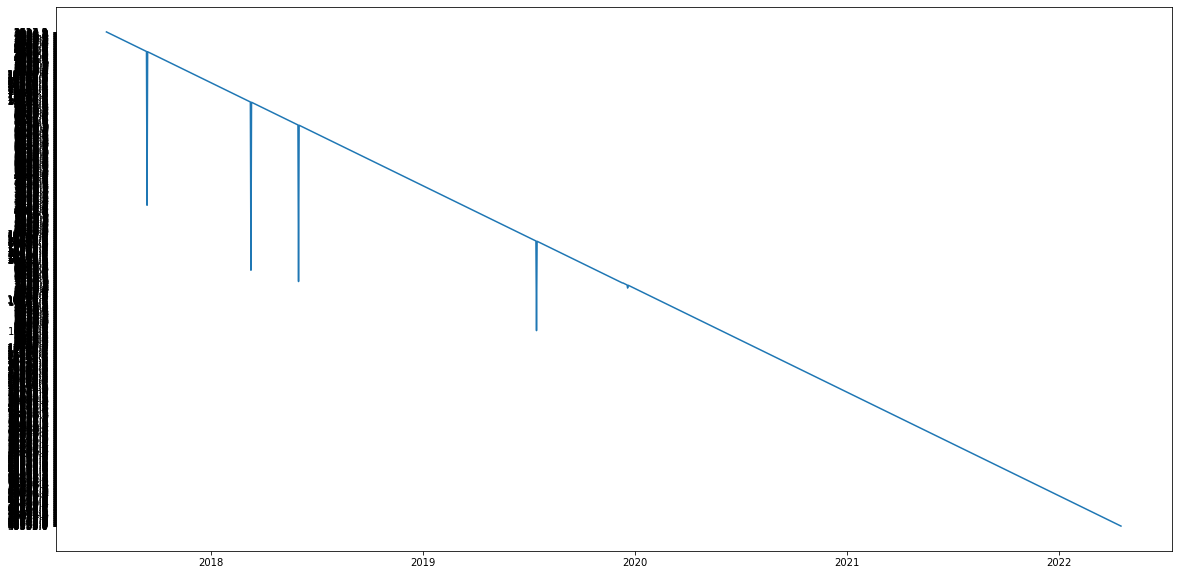

In [94]:
plt.figure(figsize=(20,10))
plt.plot(ts)

In [95]:
from statsmodels.tsa.stattools import adfuller

In [96]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)    

    

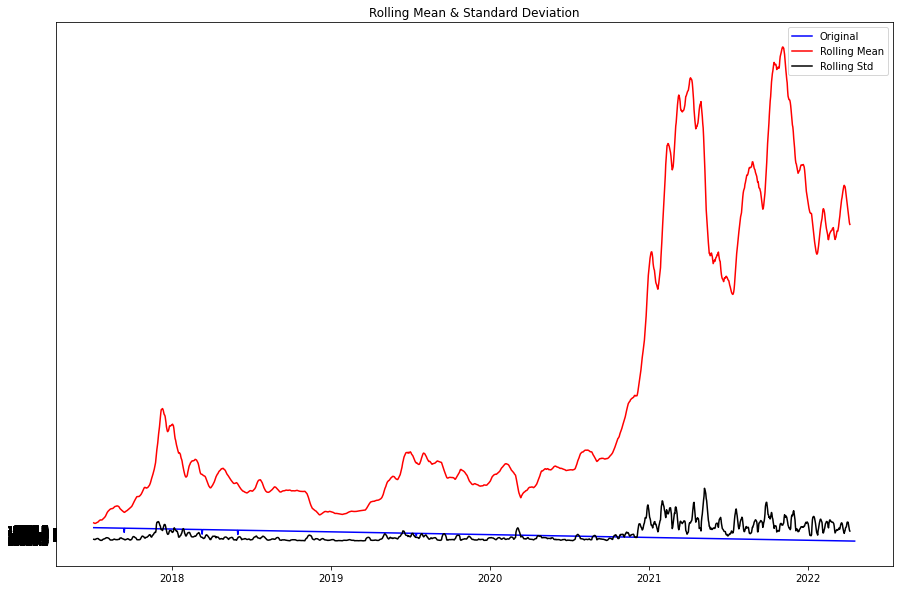

Results of Dickey-Fuller Test:


TypeError: ignored

In [99]:
plt.figure(figsize=(15,10))
test_stationarity(ts)

In [102]:
data2.rename(columns={'Price':'Close'})

,Close,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-04-18,40838.0,39700.0,41095.0,38577.0,487.59M,2.86
2022-04-17,39703.0,40382.0,40599.0,39561.0,210.01M,-1.68
2022-04-16,40382.0,40571.0,40691.0,40003.0,151.31M,-0.44
2022-04-15,40560.0,39936.0,40850.0,39781.0,233.09M,1.56
2022-04-14,39936.0,41133.0,41494.0,39585.0,294.29M,-2.91
...,...,...,...,...,...,...
2017-07-09,2511.4,2564.9,2576.7,2509.6,39.16K,-2.08
2017-07-08,2564.9,2513.9,2568.7,2480.6,54.51K,2.03
2017-07-07,2513.9,2614.2,2617.5,2484.7,90.45K,-3.84


In [105]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(data2=go.Ohlc(x=data2['Date'],
                    open=data2['Open'],
                    high=data2['High'],
                    low=data2['Low'],
                    close=data2['Close']))
fig.show()

KeyError: ignored